### Tensors

 PyTorch provides us with a data structure called a Tensor, which is very similar to NumPy’s ndarray. But unlike the latter, tensors can tap into the resources of a GPU to significantly speed up matrix operations

In [ ]:
import torch 
import numpy as np

The computation graph is simply a data structure that allows you to efficiently apply the chain rule to compute gradients for all of your parameters.

b = w1 * a

c = w2 * a 

d = (w3 * b) + (w4 * c)

L = f(d)

![image.png](https://blog.paperspace.com/content/images/size/w2000/2019/05/full_graph.png)

Now, in order to compute the gradient of any node, say, L, with respect of any other node, say c ( dL / dc) all we have to do is.

*  Trace the path from L to c. This would be L → d → c.

*  Multiply all the edge weights as you traverse along this path. The quantity you end up with is: ( dL / dd ) * ( dd / dc ) = ( dL / dc)

* If there are multiple paths, add their results.

* For example in case of dL/da, we have two paths. L → d → c → a and L → d → b→ a. We add their contributions to get the gradient of L w.r.t. a.

##### [( dL / dd ) * ( dd / dc ) * ( dc / da )] + [( dL / dd ) * ( dd / db ) * ( db / da )]

### requires_grad()

The requires_grad attribute tells autograd to track your operations. So if you want PyTorch to create a graph corresponding to these operations, you will have to set the requires_grad attribute of the Tensor to True.

### grad_fn

The grad_fn property holds the reference to the function (mathematical operator) that creates it. It is very important during a backward pass as the function here is responsible to calculate the gradient and send it to the appropriate next function in the next pass

### backward()

* The backward function takes an incoming gradient from the part of the network in front of it.

* Then it calculates the local gradient at a particular tensor.

* Then it multiplies the local gradient to with incoming gradient.

* Finally, forwards the computed gradient to the tensor’s inputs by invoking the backward method of the grad_fn of their inputs or simply save the gradient in grad property for leaf nodes

### grad:
grad holds the value of gradient. If requires_grad is False it will hold a None value. 

Even if requires_grad is True, it will hold a None value unless .backward() function is called from some other node. 

For example, if you call out.backward() for some variable out that involved x in its calculations then x.grad will hold ∂out/∂x.

![image.png](https://miro.medium.com/max/1536/1*wE1f2i7L8QRw8iuVx5mOpw.png)

### Exapmple 1

In [ ]:
x = torch.tensor(3., requires_grad=True)

a = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

y = a * x

z = y + b

z.backward()

print("Tensor x")
print(f'grad funtion = {x.grad_fn}')

print("\nTensor a")
print(f'grad funtion = {a.grad_fn}')

print("\nTensor b")
print(f'grad funtion = {b.grad_fn}')

print("\nTensor y")
print(f'grad funtion = {y.grad_fn}')

print("\nTensor z")
print(f'grad funtion = {z.grad_fn}')

Tensor x
grad funtion = None

Tensor a
grad funtion = None

Tensor b
grad funtion = None

Tensor y
grad funtion = <MulBackward0 object at 0x000001BEFFC826A0>

Tensor z
grad funtion = <AddBackward0 object at 0x000001BEFFC826A0>


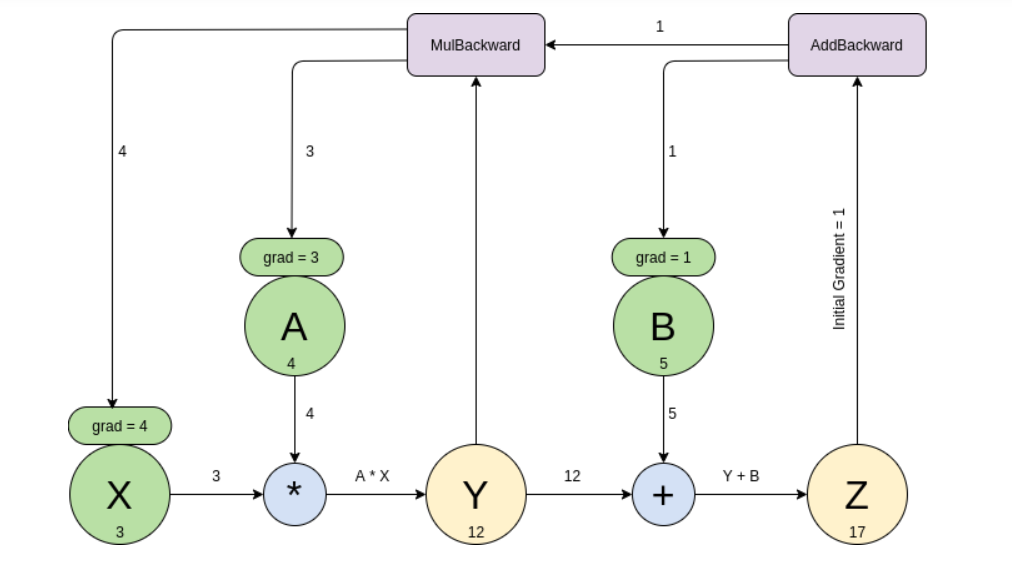


* The tensors in green are leaf nodes.

* Tensors in yellow are intermediate nodes.

* MulBackward and AddBackward are two grad_fn for y and z respectively.

* grad attribute stores the value of calculated gradients.

In [ ]:
print('dz/dx:', x.grad) 
print('dz/da:', a.grad) 
print('dz/db:', b.grad) 

dz/dx: tensor(4.)
dz/da: tensor(3.)
dz/db: tensor(1.)


### Example: 2

In [ ]:
# Define the leaf nodes
a = torch.tensor([4.0])
print(a)

tensor([4.])


In [ ]:
weights = [torch.tensor([i],requires_grad=True) for i in (2.0, 5.0, 9.0, 7.0)]
weights

[tensor([2.], requires_grad=True),
 tensor([5.], requires_grad=True),
 tensor([9.], requires_grad=True),
 tensor([7.], requires_grad=True)]

In [ ]:
# unpack the weights for nicer assignment
w1, w2, w3, w4 = weights

b = w1 * a
c = w2 * a
d = w3 * b + w4 * c
L = (10 - d)

![image.png](https://miro.medium.com/max/1684/1*FDL9Se9otGzz83F3rofQuA.png)

In [ ]:
L.backward()

for index, weight in enumerate(weights, start=1):
    gradient, *_ = weight.grad.data
    print(f" dL/w{index} : {gradient}")

 dL/w1 : -36.0
 dL/w2 : -28.0
 dL/w3 : -8.0
 dL/w4 : -20.0


### Example: 3 Scalar example

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
y = x + 2# tensor opeartion
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y * 3 # more operation
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
out.backward()

In [ ]:
print(x.grad) #gradients d(out)/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


![image.png](https://i.stack.imgur.com/4o5qL.png)

### Examples 4: Non Scalar

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [ ]:
x = torch.tensor([1.6271,-0.3254,-0.3567], requires_grad=True)

print(x)
y = x * 2
y.data.norm()

tensor([ 1.6271, -0.3254, -0.3567], requires_grad=True)


tensor(3.3945)

In [ ]:

while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1666.1504, -333.2096, -365.2608], grad_fn=<MulBackward0>)


In [ ]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001]) # specifying gradient because input is non-scalar
print(gradient)
y.backward(gradients)

print(c)
print(x.grad)

tensor(-20.)
tensor([20.], grad_fn=<MulBackward0>)
tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


![image.png](https://i.stack.imgur.com/gqHyH.png)